# TP : Schémas numériques pour les equations différentielles ordinaires (EDO)

Le but de ce TP est d'aborder la résolution numérique des EDO. Pour cela nous allons coder et tester deux algorithmes appelés **schémas**. Nous ne ferons pas, ici, leur étude mathématiques, mais il est bien sûr possible de prouver la convergence (uniforme ; dans un sens que nous ne définirons pas ici) de la solution approchée que nous allons construire vers la solution exacte.



---
## I - Un premier schéma : Le schéma d'Euler

Dans un premier temps nous allons coder les schémas classiques puis les tester sur un exemple simple afin de valider notre implémentation.

Pour ces tests, nous allons prendre un problème de Cauchy "simple" mais dont la solution n'est pas polynomiale. Il y a plusieurs choix possible comme $y'= a y +b$ ou encore le modèle de la croissance logistique.

Ce modèle décrit la croissance d'une population dans un milieu ou les ressources ou l'espace sont finis, ce qui implique une réduction de l'accroissement de la population proportionnel à la population :

*Problème 1 :*
$$ 
(L)\ \ \ \ \begin{cases}
y'(t)=a y (1 - \frac{y}{K}),\\
y(0)=y_0.
\end{cases}
$$

La solution de cette équation est :
$$
y(t) = \frac{K}{1 + \frac{K-y0}{y0} e^{-at}},
$$

<div class="alert alert-info">
    
Tous les schémas consistent en deux étapes :
    
+ discrétiser l'intervalle de temps $[0:T]$ : c'est à dire choisir $\Delta t>0$ puis  remplacer l'intervalle de temps par les instants $t_i = 0 + i \Delta t$ pour $i$ allant de $0$ à $N= T/ \Delta t$.
+ Construire une une suite $u_n$ telle que $u_n \approx y(t_n)$ avec $y$ la solution exacte (que l'on ne connait pas forcément).
    
</div>

*Remarque : on admet que pour les schémas proposés ici $max_n \vert u_n - y(t_n) \vert$ tend vers 0 lorsque $\Delta t$ tend vers 0.*

Le schéma le plus simple que l'on puisse écrire est le **schéma d'Euler** où la suite $u_n$ est définie par :

\begin{equation}
\begin{cases}
u_0 &= y_0 \\
u_{n+1} &= u_n + \Delta t f(t_n,u_n)
\end{cases}
\end{equation}

**Question 1**
> Ecrire une fonction `solve_euler` qui :
>    + prend en argument $t0$, la donnée initiale $y0$, le temps final $T$ et le nombre de point $N$,
>    + calcule $dt=T/N$ puis la suite de récurrence donnée juste au-dessus par le schéma d'Euler.
>    + renvoie deux tableaux : $time=(t_i)$ et $u=(u_i)$ ($u$ pour un problème scalaire pourra être soit un tableau de dimension 1 à $N$ élément soit un tableau de dimension 2 à $N$ colonnes et $1$ ligne).

In [125]:
import numpy as np

def solve_euler(t0,y0,T,N,f):
    dt = T/N
    print(dt)
    time = np.empty(N+1)
    u = np.empty(N+1)
    time[0] = t0
    u[0] = y0 
    for i in range(0,N):
        u[i+1] = u[i] + dt * f(time[i],u[i])
        time[i+1] = time[0] + (i + 1) * dt 
    return time ,u 

**Question 2**
> + Testez le schéma d'Euler sur le modèle logistique (L). On pourra prendre par exemple $K=a=1$ et $y0=2$ ou $0.5$.
> + Comparer la solution approchée obtenue à la solution exacte.

In [126]:
# Outils pour lle problème de Cauchy L

def L_rhs(t,x,a=1.,K=1.):
    """Second membre pour la croissance logisitque"""
    return a*x*(1.-x/K)

def L_sol(t,a=1.,K=1.,y0=2.):
    """
    Solution pour la croissance logistique.
    
    Si t est un tableau à N élément, on décide de renvoyer un tableau de dimension 2 à (N,1) éléments pour être cohérent avec schéma.
    """
    if np.isscalar(t):
        return 1./(1+(K/y0 -1)*np.exp(-a*t))
    else :
        tmp =1./(1+(K/y0 -1)*np.exp(-a*t))
        return tmp.reshape(1,len(t))

0.2
0.2


Text(0.5, 0.98, "Schéma d'Euler pour le modèle logistique")

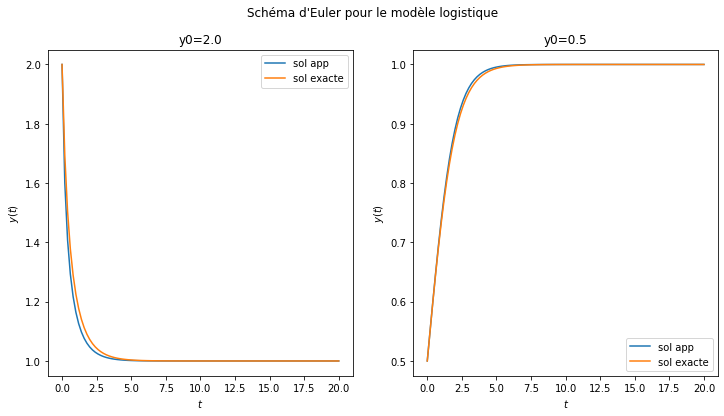

In [127]:
# Résolution de l'edo L et graphique :
import matplotlib.pyplot as plt 

N = 100
T = 20
t0 = 0

Y = [2.,0.5]

a = 1.
K = 1.

fig,ax=plt.subplots(1,2,figsize=(12,6))

time1,u1=solve_euler(t0,Y[0],T,N,L_rhs)
solex1=L_sol(time1,a,K,Y[0])

time2,u2=solve_euler(t0,Y[1],T,N,L_rhs)
solex2=L_sol(time2,a,K,Y[1])


ax[0].plot(time1,u1,label='sol app')
ax[0].plot(time1,solex1[0,:],label='sol exacte')
ax[0].set_title(f'y0={Y[0]}')
ax[0].legend()
ax[0].set_xlabel(f'$t$')
ax[0].set_ylabel(f'$y(t)$')

ax[1].plot(time2,u2,label='sol app')
ax[1].plot(time2,solex2[0,:],label='sol exacte')
ax[1].set_title(f'y0={Y[1]}')
ax[1].legend()
ax[1].set_xlabel(f'$t$')
ax[1].set_ylabel(f'$y(t)$')


fig.suptitle('Schéma d\'Euler pour le modèle logistique')


___
## II - Un second schéma plus précis

Le schéma d'Euler commet une petite erreur. En augmentant $N$ on peut diminuer cette erreur (testez-le !) mais il est possible aussi d'utiliser un schéma plus précis comme le **schéma du point du milieu** définit par :
\begin{align}
    u_0 & = y_0 \\
    u_{n+1/2} &= u_n + 0.5dt\times f(t_n,u_n) \\
    u_{n+1} &= u_n + 0.5dt\times f(t_n+0.5dt,u_{n+1/2}) 
\end{align}

**Question 3**
> 1. Ecrire une fonction `solve_pt_mid` qui :
>    + prend en argument $t0$, la donnée initiale $y0$, le temps final $T$ et le nombre de point $N$,
>    + calcule $dt=T/N$ puis la suite de récurrence donnée juste au-dessus par le schéma du point du milieu.
>    + renvoie deux tableaux : $time=(t_i)$ et $u=(u_i)$ ($u$ pour un problème scalaire pourra être soit un tableau de dimension 1 à $N$ élément soit un tableau de dimension 2 à $N$ colonnes et $1$ ligne). Ne pas renvoyer les $u_{n+1/2}$.
> 2. Refaites le test précédent et comparer avec la solution exacte et le schéma d'Euler explicite.

In [128]:
def solve_pt_mid(t0, y0, T, N, f):
    """renvoie deux tableaux : 𝑡𝑖𝑚𝑒=(𝑡𝑖) et 𝑢=(𝑢𝑖) pour
    la suite de récurrence donnée juste au-dessus par Un second schéma plus précis."""
    dt = T/N
    u=np.empty(N+1)
    time=np.empty(N+1)
    u[0]=y0
    time[0]=0
    for i in range(0, N):
        udemi = u[i] + 0.5*dt*f(time[i],u[i])
        u[i+1]= u[i] + dt*f(time[i]+0.5*dt,udemi)
        time[i+1]= (i+1)*dt+t0
    return(time,u)


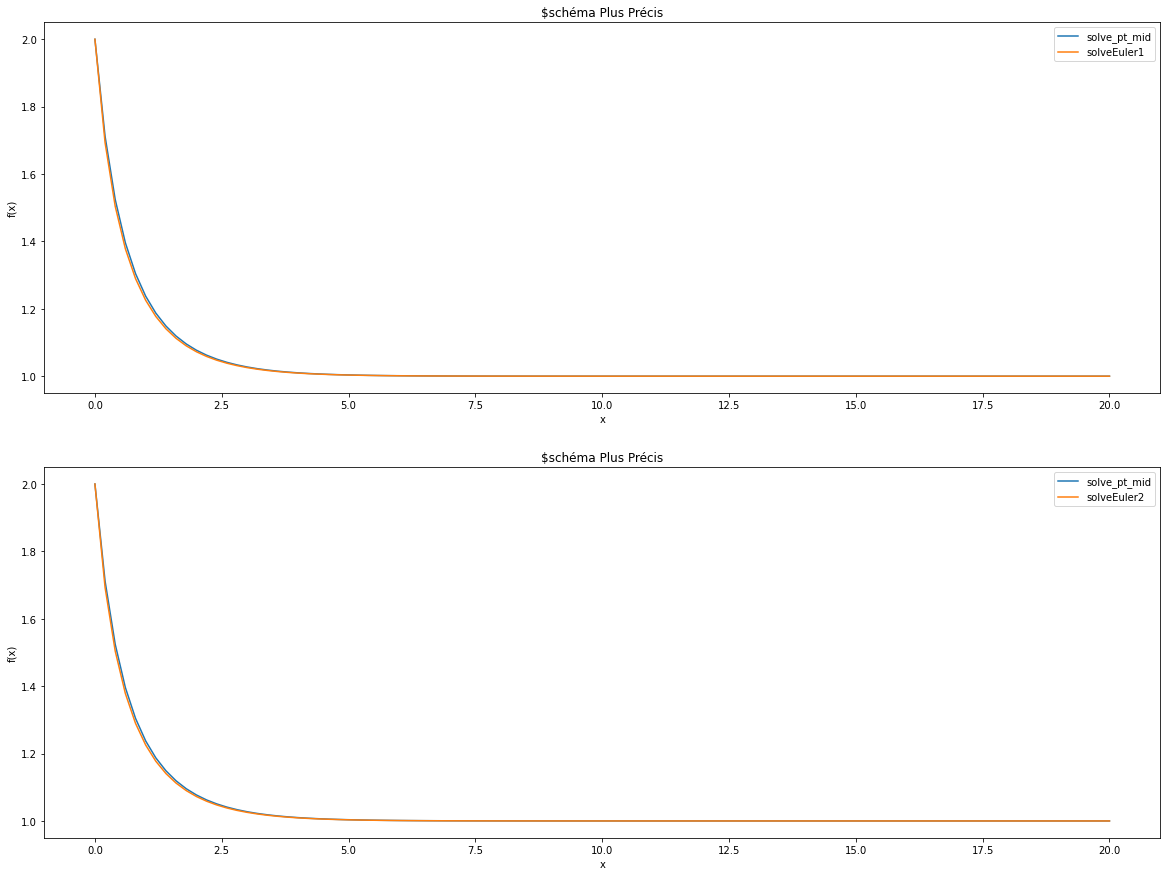

In [143]:
w,z=solve_pt_mid(0, 2, T, N, L_rhs)

sol1=L_sol(time1,a=1.,K=1.,y0=2.)[0,:]
sol2=L_sol(time2,a=1.,K=1.,y0=2.)[0,:]

fig, ax = plt.subplots(2, 1, figsize=(20,15))
ax[0].plot(w, z, label="solve_pt_mid")
ax[0].set_title(r'$schéma Plus Précis')
ax[0].set_xlabel("x")
ax[0].set_ylabel("f(x)")
ax[0].plot(w, sol1, label="solveEuler1")
ax[0].legend()

ax[1].plot(w, z, label="solve_pt_mid")
ax[1].set_title(r'$schéma Plus Précis')
ax[1].set_xlabel("x")
ax[1].set_ylabel("f(x)")
ax[1].plot(w, sol2, label="solveEuler2")
ax[1].legend()






___
## II - Calcul de l'ordre dans le cas où la solution exacte est connue

Soit $y$ la solution exacte du problème $L$ et $(u_n)_{n \in \mathbb{N}}$ la solution numérique. L'erreur locale est définie par :
$$e_k = \vert y(t_k) - u_k \vert$$
On appelle erreur globale la quantité :
$$
E(dt) =  \max_{k=0,\cdots,N}( e_k). 
$$

Le théorème de convergence indique que $E(dt)$ est majoré par $C dt^p$ avec $p$ l'ordre du schéma. En pratique nous allons voir que cette erreur est général proportionnelle à $dt^p$ pour des pas de temps assez petit.

*Ceci signifie que $\log\big[E(dt)\big] \sim \tilde{C}+p\log(dt)$ pour une certaine constante $\tilde{C}$. Nous allons donc utiliser des courbes loglog pour calculer l'ordre. En effet il est bien plus facile de calculer la pente d'une droite que de distinguer $Cx^4$ de $Cx^3$ pour $x$ positif et petit.*

**Question 4**
> Ecrire une fonction `calcule_erreur` qui : 
> + prend en argument `f, t0, y_exacte` (où $f$ est le second membre et `y_exacte` la solution exacte),
> + calcule la solution numérique pour différente valeur de $N$ (par exemple $10, 20, 50, 100, 200, 400, 1000, 2000$) puis l'erreur $E(T/N)$ pour ces différentes valeurs de $N$,
> + renvoit ces erreurs dans un tableau.

> Testez votre fonction pour le schéma d'Euler explicite et le problème (L), $N E(T/N)$ doit être proche d'une constante.

In [149]:
# Paramètres
y0 = 2.
T= 3.
t0 = 0.
N = np.array([10,20,50,100,200,400,1000,2000])

def calcule_erreur(f,T,t0,y0,N,y_exacte):
    tab1 = np.empty(8)
    tab2 = np.empty(8)
    for i in range(N.size):
        time,u=solve_euler(t0,y0,T,N[i],f)
        solex=L_sol(time,a,K,y0)
        ek = np.abs(solex - u)
        Edt = np.amax(ek)
        tab1[i] = Edt
        
        time,u=solve_pt_mid(t0,y0,T,N[i],f)
        solex=L_sol(time,a,K,y0)
        ek = np.abs(solex - u)
        Edt = np.amax(ek)
        tab2[i] = Edt
        
    dt = T/N
    
    fig,ax=plt.subplots(figsize=(12,6))
    ax.plot(dt,tab1,"o-",label="euler")
    ax.plot(dt,tab2,"o-",label="pt mid")
    ax.plot(dt,dt,"o-",label='id')
    ax.plot(dt,pow(dt,2),"o-", label='square')
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.legend()


0.3
0.15
0.06
0.03
0.015
0.0075
0.003
0.0015


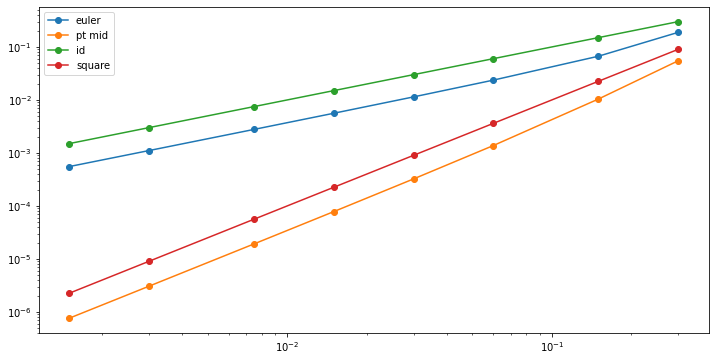

In [150]:
calcule_erreur(L_rhs,T,t0,y0,N,L_sol)

**Question 5**
> 1. Toujours pour la croissance logistique, utilisez la fonction précédente sur les trois schémas implémentés.
> 2. Sur un même graphique en échelle log-log, tracez l'erreur en fonction de $dt=T/N$.
> 3. Estimez la pente des droites obtenues.

*Indication : la façon la plus simple d'estimer les pentes est de tracez $h \mapsto C h^k$ pour des valeurs convenablement choisies de $C$ et $k$ (vous savez déjà quel pente vous devez trouver !).*

---
## IV - Résolution numérique d'un problème vectoriel

On s'intéresse désormais au problème, le système de Lokta-Voltera :

*Problème 2* : 
\begin{equation} (LV) \quad \begin{cases}\dot{L} = \tau_L L -pRL \\
\dot{R} = \tau_R(\alpha L -1)R \end{cases}  \end{equation}
avec $L(0) =L_0$ et $R(0) = R_0$. $L$ désigne le nombre de lapin et $R$ le nombre de renard, qui sont des prédateurs des lapins.

Pour ce système, on ne peut pas calculer la solution théorique de ce problème (mais on peut quand même montrer que les solutions sont périodiques). C'est dans ce cas que la résolution numérique d'une EDO devient utile.

In [162]:
# -------------------- Valeurs des paramètres --------------------
# Unité de temps : jour
tauL = 1./32 # La durée de gestation est de 32 jours, fertilité toute l'année.
p = 0.1/32
alpha = 1/100
tauR = 4.5/365 # Une reproduction par an avec des portées de 4 à 5 individus.
t0 = 0
T = 3*365 # Evolution sur 3 ans
P0 = np.array([50.,10.])

**Question**

> Implémenter la fonction `pop_LV` qui :
> + prend en argument $t \in \mathbb{R}$ et un tableau contenant $[L,R]$ à l'instant $t$ ,
> + renvoie, sous forme de tableau, les dérivées $[\dot{L},\dot{R}]$.
> En posant $P = [L,R]$, montrer que l'on a bien $\dot{P}(t) = pop\_LV\big[t,P(t)\big]$.

In [2]:
# METTRE ICI VOTRE CODE


**Question**
> Testez les schémas précédemment codés pour cde nouveau problème, après les avoir au besoin adapté à une edo vectorielle. On pourra prendre $dt= 1$.

In [95]:
# METTRE VOTRE CODE ICI


**Question**
> Dessinez les orbites (ce sont les courbes paramètrées $t-> [L(t),R(t)]$). Elles doivent être périodiques.

In [1]:
# METTRE VOTRE CODE ICI
